In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
#pd.set_option("display.max_rows", None, "display.max_columns", None)

Populating the interactive namespace from numpy and matplotlib


## Question 1

In [2]:
gold = pd.read_csv('gold.txt', sep="\t", names=["url", "category"])
labels =  pd.read_csv('labels.txt', sep="\t", names=["turk","url", "category"])
display(labels,gold)

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X
...,...,...
1512,http://zipcodez.com,G
1513,http://zml.com,P
1514,http://zonezero.com,G
1515,http://zooped.com,R


## Question 2

In [3]:
labels_on_gold = labels[labels['url'].isin(gold['url'])]
labels_unknown  = labels[~labels['url'].isin(gold['url'])]
display(labels_on_gold, labels_unknown)

,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G
...,...,...,...
91766,A35CBDDGBM7T6E,http://yousendit.com,G
91767,A3J86MK3VIE6ST,http://yousendit.com,G
91768,A4GP97LAQCCHJ,http://yousendit.com,G
91769,AAQNUEUU7H1Y5,http://yousendit.com,G


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


## Question 3

In [4]:
gl_merge = gold.merge(labels_on_gold, left_on = ['url'], right_on = ['url'], suffixes = ['_g','_l'])
correct_t = gl_merge[gl_merge['category_g'] == gl_merge['category_l']]['turk'].value_counts().to_frame(name = 'Avg Correctness')
numb_r = gl_merge['turk'].value_counts().to_frame(name = 'Number of Ratings')
rater_goodness = numb_r.merge(correct_t,how = 'left',left_on = numb_r.index, right_on = correct_t.index).set_index('key_0')
rater_goodness.rename_axis(None,inplace = True)
rater_goodness['Avg Correctness'].fillna(0,inplace = True)
rater_goodness.loc[:,'Avg Correctness'] = rater_goodness['Avg Correctness']/rater_goodness['Number of Ratings']

In [5]:
#rater_goodness = pd.DataFrame(columns = ['Number of Ratings', 'Avg Correctness'],index =gl_merge['turk'].value_counts().index.tolist())
#rater_goodness['Number of Ratings'] = gl_merge['turk'].value_counts().tolist()
display(rater_goodness)

,Number of Ratings,Avg Correctness
A31OCN4MNHUQ6W,184,0.777174
A153PKAL7OAY36,148,0.722973
A2BTR0GQ5B5JI6,126,0.523810
ATVALOQVDCMZW,103,0.854369
AZSDW7JJL5VA7,100,0.680000
...,...,...
A112DVP1KG4QZU,1,1.000000
A2EG8FHODTEV63,1,0.000000
A1D0ITFKRWUYKZ,1,0.000000
AJ8O44SR8ELPA,1,1.000000


## Question 4

In [6]:
rater_goodness['odds'] = (rater_goodness['Avg Correctness']/(1.001-rater_goodness['Avg Correctness']))
rater_goodness

,Number of Ratings,Avg Correctness,odds
A31OCN4MNHUQ6W,184,0.777174,3.472222
A153PKAL7OAY36,148,0.722973,2.600369
A2BTR0GQ5B5JI6,126,0.523810,1.097695
ATVALOQVDCMZW,103,0.854369,5.826657
AZSDW7JJL5VA7,100,0.680000,2.118380
...,...,...,...
A112DVP1KG4QZU,1,1.000000,1000.000000
A2EG8FHODTEV63,1,0.000000,0.000000
A1D0ITFKRWUYKZ,1,0.000000,0.000000
AJ8O44SR8ELPA,1,1.000000,1000.000000


## Question 5

In [7]:
rater_goodness[rater_goodness['Number of Ratings'] >= 20].sort_values('Avg Correctness',ascending = False).head(10)

,Number of Ratings,Avg Correctness,odds
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A20PWAB7G3HDHU,20,0.800000,3.980100
A32W20KGQXS0LL,25,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635
A31OCN4MNHUQ6W,184,0.777174,3.472222


## Question 6

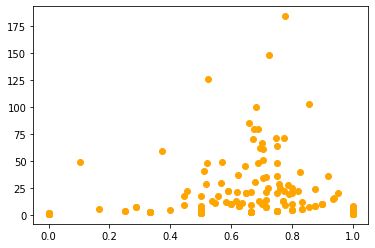

In [8]:
#There are no relationships?
scatter(rater_goodness['Avg Correctness'], rater_goodness['Number of Ratings'], color='orange')

## Question 7

In [10]:
#base =int(0.25 * 269)
#reliable = rater_goodness.head(base)
def compare_num_rating(df,percent):
    result = []
    base = (percent *len(df))
    for i,row in df.iterrows():
        total = len(df[df['Number of Ratings'] < row['Number of Ratings']])
        if total > base:
            result.append(i)
    return df[df.index.isin(result)]

reliable = compare_num_rating(rater_goodness,0.75)
reliable

,Number of Ratings,Avg Correctness,odds
A31OCN4MNHUQ6W,184,0.777174,3.472222
A153PKAL7OAY36,148,0.722973,2.600369
A2BTR0GQ5B5JI6,126,0.523810,1.097695
ATVALOQVDCMZW,103,0.854369,5.826657
AZSDW7JJL5VA7,100,0.680000,2.118380
...,...,...,...
AV30XWLULCP43,13,0.615385,1.595851
AMOMADKDPO6R5,13,0.769231,3.318951
A8XTEV2JA6R2X,13,0.692308,2.242711
A4GP97LAQCCHJ,12,0.583333,1.396648


In [11]:
reliable_labels = labels_unknown.merge(reliable, left_on = ['turk'],right_on = reliable.index)
overall_odds = reliable_labels.groupby(['url','category'])[['odds']].prod().reset_index()
reliable_labels

,turk,url,category,Number of Ratings,Avg Correctness,odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,41,0.512195,1.047852
1,A1PXXEOGQ76RNJ,http://000.cc,G,41,0.512195,1.047852
2,A1PXXEOGQ76RNJ,http://0000.jp,G,41,0.512195,1.047852
3,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852
4,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852
...,...,...,...,...,...,...
40616,amurray,http://www.blazzpage.7p.com/,G,15,0.933333,13.793103
40617,amurray,http://www.byroncrawford.com/,P,15,0.933333,13.793103
40618,amurray,http://www.freelayouticons.com/,P,15,0.933333,13.793103
40619,amurray,http://www.hollywoodtuna.com/?p=4729,R,15,0.933333,13.793103


## Question 8

In [ ]:
result_75 = pd.DataFrame(columns = ['top category', 'top odds'], index=overall_odds['url'].value_counts().index.tolist())
result_75

In [ ]:
for i, row in result_75.iterrows():
    ind = overall_odds[overall_odds['url'] == i]['odds'].idxmax()
    row['top odds'] = overall_odds[overall_odds['url'] == i]['odds'].max()
    row['top category'] = overall_odds[overall_odds.index == ind]['category'].values.tolist()[0]

In [ ]:
result_75

## Question 9

In [12]:
reliable2 = compare_num_rating(rater_goodness,0.25)
reliable_labels2 = labels_unknown.merge(reliable2, left_on = ['turk'],right_on = reliable2.index)
reliable_labels2

,turk,url,category,Number of Ratings,Avg Correctness,odds
0,A1OT3A29R9N1DG,http://000.cc,P,8,0.500000,0.998004
1,A1OT3A29R9N1DG,http://1centemails.com,G,8,0.500000,0.998004
2,A1OT3A29R9N1DG,http://24hfx.com,P,8,0.500000,0.998004
3,A1OT3A29R9N1DG,http://265e.com,P,8,0.500000,0.998004
4,A1OT3A29R9N1DG,http://30gh.com,G,8,0.500000,0.998004
...,...,...,...,...,...,...
66205,AMD9GAZO9NECR,http://filife.com,G,2,0.500000,0.998004
66206,AMD9GAZO9NECR,http://filthdump.com,X,2,0.500000,0.998004
66207,A204NDFTMBY7KJ,http://free4m.tripod.com/,R,4,1.000000,1000.000000
66208,A2MC38IV7L231H,http://realsocialdynamics.com,P,3,0.333333,0.499251


In [ ]:
overall_odds2 = reliable_labels2.groupby(['url','category'])[['odds']].prod().reset_index()
overall_odds2
result_25 = pd.DataFrame(columns = ['top category', 'top odds'], index=overall_odds2['url'].value_counts().index.tolist())

In [ ]:
for i, row in result_25.iterrows():
    ind = overall_odds2[overall_odds2['url'] == i]['odds'].idxmax()
    row['top odds'] = overall_odds2[overall_odds2['url'] == i]['odds'].max()
    row['top category'] = overall_odds2[overall_odds2.index == ind]['category'].values.tolist()[0]